# CS156 Session 7.1 Pre-class work

## 1. The Coin-Flipping Experiment
Read through the coin-flipping example given by Do and Batzoglou (2008). In the coin-flipping example, there are two coins with different biases in a bag. One coin is much more likely to come up with heads than the other. To create the data:

1. Reach into the bag and pull out a coin.
2. Flip that coin many times, and record both the number of heads and the number of throws.
3. Return the coin to the bag and repeat.
Notice that we never find out the identity of the coin we are flipping, but we do try to infer it.

## Questions

### 1. Write down the probability distribution for such a model.
Binomial distribution (where $\theta$ is the probability of heads and $k$ is the number of heads in $n$ flips): $$ p(k) = \binom{n}{k} \theta^k (1-\theta)^{n-k}$$

### 2. Write Python code to run the EM algorithm on such a dataset.

**Import Packages**

In [31]:
import numpy as np
import matplotlib.pyplot as plt

**EM Algorithm**

In [46]:
#Starting probability of heads for the different coins
coin_theta = [0.6, 0.5]

#Starting probabilities of picking each coin
coin_probs = [0.45,0.55]

#Data – The number of heads and the corresponding number of throws
heads = [14, 33, 19, 10, 0, 17, 24, 17, 1, 36, 5, 6, 5, 13, 4, 35, 5, 5, 74, 34]
throws = [41, 43, 23, 23, 1, 23, 36, 37, 2, 131, 5, 29, 13, 47, 10, 58, 15, 14, 100, 113]

def EM_algorithm(theta,coin_probs,heads,throws,num_iter=10):
    
    #List to store the theta updates
    thetas = [theta]
    
    #List to store p(coin|data)
    coin_probs_list = [coin_probs]
    
    #EM algorithm iteration phase
    for _ in range(num_iter):
        
        #List to store the probabilities of the coins determined from the data
        #p_coins = []
        
        #List to store the expected number of heads across all datapoints for each coin
        exp_heads = []
        
        #List to store the expected number of throws across all datapoints for each coin
        exp_throws = []
        
        
        #Iterate through all the data points
        for h,t in zip(heads,throws):
            
            #Compute normalization term by summing likelihoods 
            #– will be used to determine probabilities
            normalization_term = sum([coin_probs[c]*theta[c]**h*(1-theta[c])**(t-h) for c in [0,1]])
    
            #Compute the likelihoods given the data
            likelihoods = [coin_probs[c]*theta[c]**h*(1-theta[c])**(t-h) for c in [0,1]]
    
            #Compute the probability of each of the coins given the data
            p_coins_given_data = np.array(likelihoods)/normalization_term
            
            coin_probs_list.append(p_coins_given_data)
            
            #Compute the expected number of heads for both coins
            exp_heads.append(p_coins_given_data*h)
            
            #Compute the expected number of throws for both coins
            exp_throws.append(p_coins_given_data*t)
           
        thetas.append(np.array(exp_heads).sum(axis=0)/np.array(exp_throws).sum(axis=0))
        
    return thetas, coin_probs_list
        

In [47]:
coin_bias, coin_probs = EM_algorithm(coin_thetas,coin_probs,heads,throws)

In [48]:
print(f"The final coin biases are {coin_bias[-1]} for Coin 1 and Coin 2, respectively")
print(f"The avg coin probabilities are {np.array(coin_probs).mean(axis=0)} for Coin 1 and Coin 2, respectively")

The final coin biases are [0.69342275 0.3335119 ] for Coin 1 and Coin 2, respectively
The avg coin probabilities are [0.40860034 0.59139966] for Coin 1 and Coin 2, respectively


**Plot Convergence Figure**

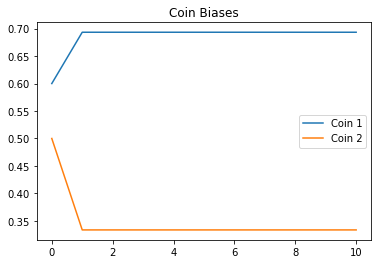

In [49]:
plt.plot(coin_bias)
plt.legend(['Coin 1', 'Coin 2'])
plt.title("Coin Biases")
plt.show()